<img src="https://github.com/LinkedEarth/Logos/blob/master/PyLiPD/pyLiPD_logo1_transparent.png?raw=true" width ="800">

# Filtering through queries

## Authors

[Deborah Khider](https://orcid.org/0000-0001-7501-8430)

## Preamble

`PyLiPD` is a Python package that allows you to read, manipulate, and write [LiPD](https://doi.org/10.5194/cp-12-1093-2016) formatted datasets. In this tutorial, we will demonstrate how to use pre-defined filtering capabilities through APIs. 

<div class="alert alert-success">
<b>Note:</b> These capabilities are under heavy development. If you are interested in other filtering capabilities to help with your science, please <a href='https://github.com/LinkedEarth/pylipd/issues'>open an issue</a>.
</div>

### Goals

* Use existing APIs to filter datasets according to archive types, location and variable names.
* Understand the concept of a `LiPDSeries` object and how it differs from `LiPD` object.

Reading Time: 5 minutes

### Keywords

LiPD

### Pre-requisites

* This tutorial assumes basic knowledge of Python and Pandas. If you are not familiar with this coding language and this particular library, check out this tutorial: http://linked.earth/ec_workshops_py/.
* [Retrieving Information from LiPD files](L1_getting_information.md)

### Relevant Packages

pylipd

## Data Description

This notebook uses the following datasets, in LiPD format:

- Euro2k database: PAGES2k Consortium (2017), A global multiproxy database for temperature reconstructions of the Common Era. Sci Data 4, 170088. doi:10.1038/sdata.2017.88

## Demonstration

### Filtering on the `LiPD` object

#### Filtering by the type of archive

Let's start by importing our favorite package and load our datasets. 

In [1]:
from pylipd.lipd import LiPD

path = '../data/Pages2k/'

D = LiPD()
D.load_from_dir(path)

Loading 16 LiPD files


100%|██████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.90it/s]

Loaded..


And let's get a list of available datasets so we can compare the results as we filter using various criteria:

In [2]:
D.get_all_dataset_names()

['Ocn-RedSea.Felis.2000',
 'Ant-WAIS-Divide.Severinghaus.2012',
 'Asi-SourthAndMiddleUrals.Demezhko.2007',
 'Ocn-AlboranSea436B.Nieto-Moreno.2013',
 'Eur-SpannagelCave.Mangini.2005',
 'Ocn-FeniDrift.Richter.2009',
 'Eur-LakeSilvaplana.Trachsel.2010',
 'Ocn-PedradeLume-CapeVerdeIslands.Moses.2006',
 'Ocn-SinaiPeninsula_RedSea.Moustafa.2000',
 'Eur-NorthernSpain.Martin-Chivelet.2011',
 'Arc-Kongressvatnet.D_Andrea.2012',
 'Eur-CoastofPortugal.Abrantes.2011',
 'Eur-SpanishPyrenees.Dorado-Linan.2012',
 'Eur-FinnishLakelands.Helama.2014',
 'Eur-NorthernScandinavia.Esper.2012',
 'Eur-Stockholm.Leijonhufvud.2009']

Now let's look at the available types of archives for which we can filter:

In [3]:
D.get_all_archiveTypes()

['Coral',
 'Borehole',
 'Marine sediment',
 'Speleothem',
 'Lake sediment',
 'Wood',
 'Documents']

Let's first filter for speleothem records:

In [4]:
D_speleothem = D.filter_by_archive_type('speleothem')

D_speleothem.get_all_dataset_names()

['Eur-SpannagelCave.Mangini.2005', 'Eur-NorthernSpain.Martin-Chivelet.2011']

The function uses [regular expressions](https://learn.microsoft.com/en-us/dotnet/standard/base-types/regular-expression-language-quick-reference) to do partial matches. Therefore, you can look for all the datasets based on marine sediments using:

In [5]:
D_marine = D.filter_by_archive_type('marine')

D_marine.get_all_dataset_names()

['Eur-CoastofPortugal.Abrantes.2011',
 'Ocn-AlboranSea436B.Nieto-Moreno.2013',
 'Ocn-FeniDrift.Richter.2009']

However, looking for `sediment` will return records based on both marine and lake sediments:

In [6]:
D_sediment = D.filter_by_archive_type('sediment')

D_sediment.get_all_dataset_names()

['Eur-CoastofPortugal.Abrantes.2011',
 'Arc-Kongressvatnet.D_Andrea.2012',
 'Ocn-AlboranSea436B.Nieto-Moreno.2013',
 'Eur-LakeSilvaplana.Trachsel.2010',
 'Ocn-FeniDrift.Richter.2009']

In [7]:
D_marinespeleo = D.filter_by_archive_type('(marine|speleothem)')

D_marinespeleo.get_all_dataset_names()

['Ocn-FeniDrift.Richter.2009',
 'Eur-CoastofPortugal.Abrantes.2011',
 'Ocn-AlboranSea436B.Nieto-Moreno.2013',
 'Eur-NorthernSpain.Martin-Chivelet.2011',
 'Eur-SpannagelCave.Mangini.2005']

If you are not comfortable with regular expression and constructing patterns as we have done above, you can always merge two `LiPD` objects as we demonstrated [previously](L0_loading_lipd_datasets.ipynb). Therefore, the filtering above can also be achieved by combining our previous objects:

In [7]:
D_merged = D_marine.merge(D_speleothem)

D_merged.get_all_dataset_names()

['Eur-CoastofPortugal.Abrantes.2011',
 'Ocn-AlboranSea436B.Nieto-Moreno.2013',
 'Ocn-FeniDrift.Richter.2009',
 'Eur-SpannagelCave.Mangini.2005',
 'Eur-NorthernSpain.Martin-Chivelet.2011']

#### Filtering by location

Let's filter using a [bounding box](https://pylipd.readthedocs.io/en/latest/source/pylipd.html#pylipd.lipd.LiPD.filter_by_geo_bbox) between 40-70N and 0-90E:

In [9]:
D_geo = D.filter_by_geo_bbox(lonMin=0, latMin=40, lonMax=90, latMax=70)

D_geo.get_all_dataset_names()

['Eur-SpanishPyrenees.Dorado-Linan.2012',
 'Eur-NorthernScandinavia.Esper.2012',
 'Eur-SpannagelCave.Mangini.2005',
 'Asi-SourthAndMiddleUrals.Demezhko.2007',
 'Eur-FinnishLakelands.Helama.2014',
 'Eur-Stockholm.Leijonhufvud.2009',
 'Eur-LakeSilvaplana.Trachsel.2010']

Because `PyLiPD` uses object-oriented programming, we can take advantage of method cascading to create a series of filters. For instance, let's assume that we want all the datasets between 40-70N and 0-90E that are trees. One can write an additional query on top of the location query that we just performed:

In [10]:
D_geotree = D_geo.filter_by_archive_type('wood')

D_geotree.get_all_dataset_names()

['Eur-NorthernScandinavia.Esper.2012',
 'Eur-SpanishPyrenees.Dorado-Linan.2012',
 'Eur-FinnishLakelands.Helama.2014']

Using method cascading, you can write this in a single query:

In [11]:
D_filt = D.filter_by_geo_bbox(lonMin=0, latMin=40, lonMax=90, latMax=70).filter_by_archive_type('wood')

D_filt.get_all_dataset_names()

['Eur-NorthernScandinavia.Esper.2012',
 'Eur-SpanishPyrenees.Dorado-Linan.2012',
 'Eur-FinnishLakelands.Helama.2014']

#### Filtering by time interval

The [`.filter_by_time`](https://pylipd.readthedocs.io/en/latest/api.html#pylipd.lipd.LiPD.filter_by_time) method allows you to filter for a specific interval and a matching record length within that interval. The function takes three arguments:
- `timeBound` (*mandatory*): A list of the minimum and maximum time to consider
- `timeBoundType` (*optional*): As defined by the World Data Service for Paleoclimatology and an Applied Research Service for Paleoclimatology.
   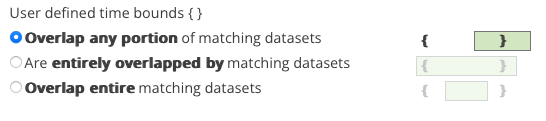
Default is `any`. 
- `recordLength`(*optional*): The minimum length of the record within the time interval.

<div class="admonition alert alert-warning"
<p class=admonition-title style=font-weight:bold>Warning</p>
As of August 2024, the function does not reason over time representation (i.e., BP vs CE) nor units (e.g., yr vs kyr). Make sure that all LiPD in your object have the same time representation and units before using this function.
</div>

Let's filter over the period [500,1800], using default settings:

In [15]:
D_filt_time1 = D.filter_by_time([500,1800])


num_records = float(len(D_filt_time1.get_all_dataset_names()))
print(f"There are {num_records} number of records matching this query.")

There are 13.0 number of records matching this query.


Let's compare to the number of records we would get if we asked for `entirely`:

In [16]:
D_filt_time2 = D.filter_by_time([500,1800], timeBoundType = 'entirely')


num_records = float(len(D_filt_time2.get_all_dataset_names()))
print(f"There are {num_records} number of records matching this query.")

There are 5.0 number of records matching this query.


A lot less records match this search criteria, which is not surprising since only records fully covering the 500-1800 period are considered. Note that when `entirely` is selected, the `recordLength` parameter has no effect.  

### Filtering on the `LiPDSeries` object

#### Filtering by variable names

Most of the time, we are interested in working with specific variables in a LiPD file. To use filtering capabilities, this requires expanding the `LiPD` object into a `LiPDSeries` object, which contains individual variables. You can do so by using the following function, applied on the filtered database of tree records from high northern latitudes: 

In [18]:
ts = D_filt.to_lipd_series()

Creating LiPD Series...
- Extracting dataset subgraphs


100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 232.86it/s]


- Extracting variable subgraphs


100%|████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 31.10it/s]

Done..


Let's have a look at what we have by placing essential metadata into a Pandas DataFrame. This function is the equivalent to `LiPD.get_timeseries_essentials` with slight differences:

In [21]:
df = ts.get_timeseries_essentials()

df.head()

,dataSetName,archiveType,name,TSID,values,units,proxy
0,Eur-NorthernScandinavia.Esper.2012,Wood,year,PYTECO66XAD,"[-138, -137, -136, -135, -134, -133, -132, -13...",yr AD,None
1,Eur-NorthernScandinavia.Esper.2012,Wood,MXD,Eur_014,"[0.46, 1.305, 0.755, -0.1, -0.457, 1.62, 0.765...",None,None
2,Eur-SpanishPyrenees.Dorado-Linan.2012,Wood,trsgi,Eur_020,"[-1.612, -0.703, -0.36, -0.767, -0.601, -0.733...",None,None
3,Eur-SpanishPyrenees.Dorado-Linan.2012,Wood,year,PYT2K8MIA3N,"[1260, 1261, 1262, 1263, 1264, 1265, 1266, 126...",yr AD,None
4,Eur-FinnishLakelands.Helama.2014,Wood,temperature,Eur_005,"[14.603, 14.643, 12.074, 13.898, 13.671, 13.41...",degC,None


As you can see, the DataFrame contains much of the same information, except for location. This is because that information is stored at the Dataset level in LiPD and is, therefore, attached to the `LiPD` object. But you can merge the data using [Pandas' capabilities](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html). First, let's get the location information:

In [14]:
df_loc = D_filt.get_all_locations()

df_loc.head()

,dataSetName,geo_meanLat,geo_meanLon,geo_meanElev
0,Eur-SpanishPyrenees.Dorado-Linan.2012,42.5,1.000,1200.0
1,Eur-NorthernScandinavia.Esper.2012,68.0,25.000,300.0
2,Eur-FinnishLakelands.Helama.2014,62.0,28.325,130.0


In [15]:
import pandas as pd

We can use the [`.merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) functionality in Pandas to achieve our goal. This functionality is very similar to `join` in SQL. The main arguments are `how` which defines how the join is achieved and `on` which specifies the column:

`how`: {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

* left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
* right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
* outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
* inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
* cross: creates the cartesian product from both frames, preserves the order of the left keys.

In [16]:
df_merged = df.merge(df_loc,how='inner', on='dataSetName')

df_merged.head()

,dataSetName,archiveType,name,TSID,values,units,proxy,geo_meanLat,geo_meanLon,geo_meanElev
0,Eur-NorthernScandinavia.Esper.2012,tree,year,PYTECO66XAD,"[-138, -137, -136, -135, -134, -133, -132, -13...",yr AD,None,68.0,25.000,300.0
1,Eur-NorthernScandinavia.Esper.2012,tree,MXD,Eur_014,"[0.46, 1.305, 0.755, -0.1, -0.457, 1.62, 0.765...",None,None,68.0,25.000,300.0
2,Eur-FinnishLakelands.Helama.2014,tree,year,PYTUSB62S0A,"[2000, 1999, 1998, 1997, 1996, 1995, 1994, 199...",yr AD,None,62.0,28.325,130.0
3,Eur-FinnishLakelands.Helama.2014,tree,temperature,Eur_005,"[14.603, 14.643, 12.074, 13.898, 13.671, 13.41...",degC,None,62.0,28.325,130.0
4,Eur-SpanishPyrenees.Dorado-Linan.2012,tree,year,PYT2K8MIA3N,"[1260, 1261, 1262, 1263, 1264, 1265, 1266, 126...",yr AD,None,42.5,1.000,1200.0


The second difference is that the variables representing time are only present as rows, which means that time will need to be associated with the variables. To do so, you can use the filtering capabilities. First, let's filter for `temperature` and `trsgi`:

In [17]:
ts_filter = ts.filter_by_name('(temperature|trsgi)')

df_paleo = ts_filter.get_timeseries_essentials()
df_paleo.head()

2


,dataSetName,archiveType,name,TSID,values,units,proxy
0,Eur-SpanishPyrenees.Dorado-Linan.2012,tree,trsgi,Eur_020,"[-1.612, -0.703, -0.36, -0.767, -0.601, -0.733...",None,None
1,Eur-FinnishLakelands.Helama.2014,tree,temperature,Eur_005,"[14.603, 14.643, 12.074, 13.898, 13.671, 13.41...",degC,None


Our next task is to get all the information regarding time. Let's use method chaining to get the DataFrame directly:

In [18]:
df_time = ts.filter_by_name('year').get_timeseries_essentials()

df_time.head()

3


,dataSetName,archiveType,name,TSID,values,units,proxy
0,Eur-SpanishPyrenees.Dorado-Linan.2012,tree,year,PYT2K8MIA3N,"[1260, 1261, 1262, 1263, 1264, 1265, 1266, 126...",yr AD,None
1,Eur-FinnishLakelands.Helama.2014,tree,year,PYTUSB62S0A,"[2000, 1999, 1998, 1997, 1996, 1995, 1994, 199...",yr AD,None
2,Eur-NorthernScandinavia.Esper.2012,tree,year,PYTECO66XAD,"[-138, -137, -136, -135, -134, -133, -132, -13...",yr AD,None


Now, we can use Pandas to merge the two DataFrames. In this case, we would expect that the DataFrame containing the time information would have more datasets associated with them (since not all datasets have a temoerature or trsgi value). Therefore, we want to perform a left join, dropping the unnecessary age information:

In [19]:
df_filt_merge=df_paleo.merge(df_time,how='left',on='dataSetName')

df_filt_merge

,dataSetName,archiveType_x,name_x,TSID_x,values_x,units_x,proxy_x,archiveType_y,name_y,TSID_y,values_y,units_y,proxy_y
0,Eur-SpanishPyrenees.Dorado-Linan.2012,tree,trsgi,Eur_020,"[-1.612, -0.703, -0.36, -0.767, -0.601, -0.733...",None,None,tree,year,PYT2K8MIA3N,"[1260, 1261, 1262, 1263, 1264, 1265, 1266, 126...",yr AD,None
1,Eur-FinnishLakelands.Helama.2014,tree,temperature,Eur_005,"[14.603, 14.643, 12.074, 13.898, 13.671, 13.41...",degC,None,tree,year,PYTUSB62S0A,"[2000, 1999, 1998, 1997, 1996, 1995, 1994, 199...",yr AD,None


Notice the Pandas automatically changed the names of the columns to accomodate the fact that both our DataFrames had the same column names. Now let's add the location information with another left join:

In [20]:
df_filt_merge_loc=df_filt_merge.merge(df_loc,how='left',on='dataSetName')

df_filt_merge_loc.head()

,dataSetName,archiveType_x,name_x,TSID_x,values_x,units_x,proxy_x,archiveType_y,name_y,TSID_y,values_y,units_y,proxy_y,geo_meanLat,geo_meanLon,geo_meanElev
0,Eur-SpanishPyrenees.Dorado-Linan.2012,tree,trsgi,Eur_020,"[-1.612, -0.703, -0.36, -0.767, -0.601, -0.733...",None,None,tree,year,PYT2K8MIA3N,"[1260, 1261, 1262, 1263, 1264, 1265, 1266, 126...",yr AD,None,42.5,1.000,1200.0
1,Eur-FinnishLakelands.Helama.2014,tree,temperature,Eur_005,"[14.603, 14.643, 12.074, 13.898, 13.671, 13.41...",degC,None,tree,year,PYTUSB62S0A,"[2000, 1999, 1998, 1997, 1996, 1995, 1994, 199...",yr AD,None,62.0,28.325,130.0


#### Filtering by proxy

LiPD files have a `proxy` field that can be used to associate the proxy used for the inference or measurements. On the LiPDVerse, this field is [standardized](https://lipdverse.org/vocabulary/paleodata_proxy/).

To get a list of all proxies available in the `LiPDSeries` object, first use the [`.get_all_proxy`](https://pylipd.readthedocs.io/en/latest/api.html#pylipd.lipd_series.LiPDSeries.get_all_proxy) method:

In [24]:
ts_all = D.to_lipd_series()
ts_all.get_all_proxy()

Creating LiPD Series...
- Extracting dataset subgraphs


100%|█████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 330.78it/s]


- Extracting variable subgraphs


100%|██████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 31.02it/s]

Done..


['ring width',
 'maximum latewood density',
 'd18O',
 'alkenone',
 'borehole',
 'historical',
 'reflectance',
 'Mg/Ca']

Let's filter for the `ring width` proxy:

In [25]:
ts_filt_proxy = ts_all.filter_by_proxy('ring width')

ts_filt_proxy.get_all_proxy()

['ring width']

#### Filtering by resolution

When a LiPD file is created the resolution is automatically calculated for each variable. This can be used to filter the records by either the mean, median, minimum and maximum resolution. To do so, you can use the [`.filter_by_resolution`](https://pylipd.readthedocs.io/en/latest/api.html#pylipd.lipd_series.LiPDSeries.filter_by_resolution) method. The `stats` parameter allows to set which one. 

In [26]:
print(f"There are {len(ts_all.get_timeseries_essentials())} variables in this LiPDSeries object.")

There are 41 variables in this LiPDSeries object.


Let's filter for a mean resolution of at least 10 years:

In [29]:
ts_filt_meanres = ts_all.filter_by_resolution(10)

print(f"There are {len(ts_filt_meanres.get_timeseries_essentials())} variables in this LiPDSeries object.")

There are 25 variables in this LiPDSeries object.


Let's redo this query with a median resolution of 10 years:

In [31]:
ts_filt_medres = ts_all.filter_by_resolution(10, stats = 'Median')

print(f"There are {len(ts_filt_medres.get_timeseries_essentials())} variables in this LiPDSeries object.")

There are 25 variables in this LiPDSeries object.


In this case, the mean or median did not seem to matter. 